In [41]:
#Importing The Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import itertools
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,confusion_matrix, accuracy_score

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
df=pd.read_csv("./Data/synthetic_smes.csv")
df.head()

,BusinessID,BusinessName,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
0,1616c3df-e6eb-4683-843e-dd09c32fef64,Parker Inc,4229027.0,712.0,7.0,0.0,1.0,0.0
1,6eebfe2a-0c55-48c7-bd84-f4f044d3b5f4,Baker LLC,1402314.0,448.0,3.0,0.0,0.0,0.0
2,b752456e-fc95-47bb-8751-65080e99e792,"Mcmahon, Miller and Daniel",1329220.0,409.0,10.0,0.0,0.0,0.0
3,a09d1441-7b38-423e-8dc1-dcc54c9300be,Shields-Mata,3965091.0,682.0,3.0,0.0,0.0,1.0
4,9c853fac-3413-48e1-a941-a82891141a9e,"Burton, Anderson and Morris",2255516.0,550.0,10.0,0.0,0.0,0.0


In [5]:
df.tail()

,BusinessID,BusinessName,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
195,378b1fc6-5ec4-4297-b92b-9026217032c1,Gardner Group,209795.0,620.0,1.0,0.0,1.0,0.0
196,c1a84fca-c0b4-475e-b1b2-e62ff8356c81,Blackwell and Sons,2020169.0,406.0,6.0,0.0,0.0,0.0
197,b5013b87-654b-4a01-91da-afbac01795ae,"Jackson, Wang and Dillon",4316671.0,482.0,5.0,0.0,0.0,0.0
198,dce8b4da-27fb-494c-aa5e-c49042e94f92,"Orozco, Roberts and Lee",1243067.0,736.0,0.0,0.0,0.0,0.0
199,db1306e7-3d56-4f2d-a7bb-3d9916fd8064,Johnson Inc,2550761.0,559.0,9.0,0.0,0.0,0.0


In [8]:
df['CreditScore'].min(), df['CreditScore'].max()

(303.0, 850.0)

In [6]:
# Drop BusinessID and BusinessName columns
df.drop(['BusinessID', 'BusinessName'], axis=1, inplace=True)

In [7]:
df.head()

,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
0,4229027.0,712.0,7.0,0.0,1.0,0.0
1,1402314.0,448.0,3.0,0.0,0.0,0.0
2,1329220.0,409.0,10.0,0.0,0.0,0.0
3,3965091.0,682.0,3.0,0.0,0.0,1.0
4,2255516.0,550.0,10.0,0.0,0.0,0.0


In [9]:
# Add another column 6MonthsRevenue that is half the AnnualRevenue
df['6MonthsRevenue'] = df['AnnualRevenue'] / 2

In [10]:
df.head()

,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology,6MonthsRevenue
0,4229027.0,712.0,7.0,0.0,1.0,0.0,2114513.5
1,1402314.0,448.0,3.0,0.0,0.0,0.0,701157.0
2,1329220.0,409.0,10.0,0.0,0.0,0.0,664610.0
3,3965091.0,682.0,3.0,0.0,0.0,1.0,1982545.5
4,2255516.0,550.0,10.0,0.0,0.0,0.0,1127758.0


In [13]:
df.isnull().sum()

AnnualRevenue          0
CreditScore            0
LatePayments           0
Industry_Healthcare    0
Industry_Retail        0
Industry_Technology    0
6MonthsRevenue         0
dtype: int64

In [14]:
# Check for duplicates
df.duplicated().sum()

0

### Histogram to show the distribution of the data

array([[<Axes: title={'center': 'AnnualRevenue'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'LatePayments'}>],
       [<Axes: title={'center': 'Industry_Healthcare'}>,
        <Axes: title={'center': 'Industry_Retail'}>,
        <Axes: title={'center': 'Industry_Technology'}>],
       [<Axes: title={'center': '6MonthsRevenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

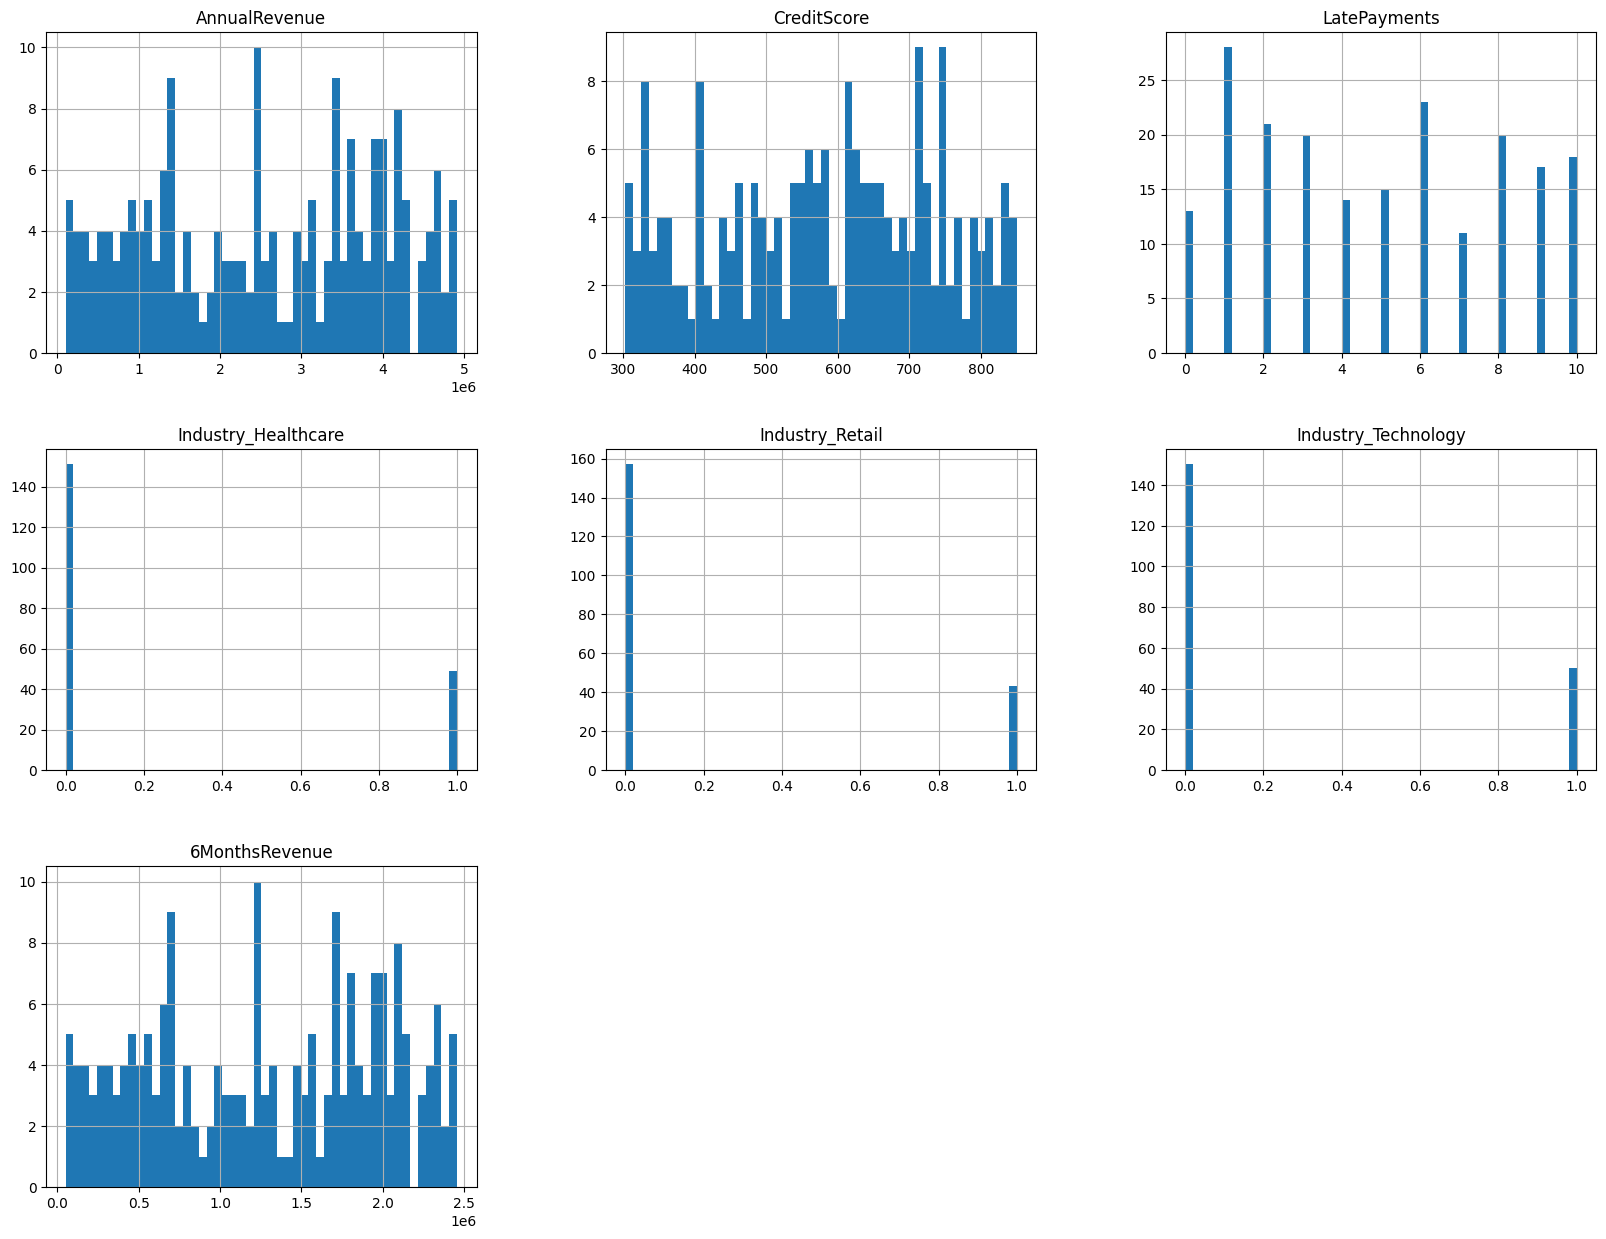

In [15]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))

In [16]:
df.skew()

AnnualRevenue         -0.082063
CreditScore           -0.145249
LatePayments           0.121013
Industry_Healthcare    1.194786
Industry_Retail        1.397968
Industry_Technology    1.163445
6MonthsRevenue        -0.082063
dtype: float64

In [17]:
corr = df.corr()
corr

,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology,6MonthsRevenue
AnnualRevenue,1.000000,0.035504,0.094409,0.024065,-0.100839,0.107164,1.000000
CreditScore,0.035504,1.000000,0.079175,-0.059859,0.108357,0.001116,0.035504
LatePayments,0.094409,0.079175,1.000000,0.009492,-0.008942,-0.102638,0.094409
Industry_Healthcare,0.024065,-0.059859,0.009492,1.000000,-0.298122,-0.328889,0.024065
Industry_Retail,-0.100839,0.108357,-0.008942,-0.298122,1.000000,-0.302151,-0.100839
Industry_Technology,0.107164,0.001116,-0.102638,-0.328889,-0.302151,1.000000,0.107164
6MonthsRevenue,1.000000,0.035504,0.094409,0.024065,-0.100839,0.107164,1.000000


<Axes: title={'center': 'Log Normal - Annual Revenue'}, xlabel='AnnualRevenue'>

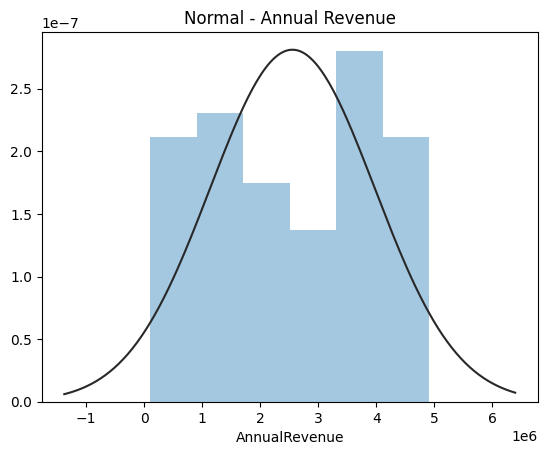

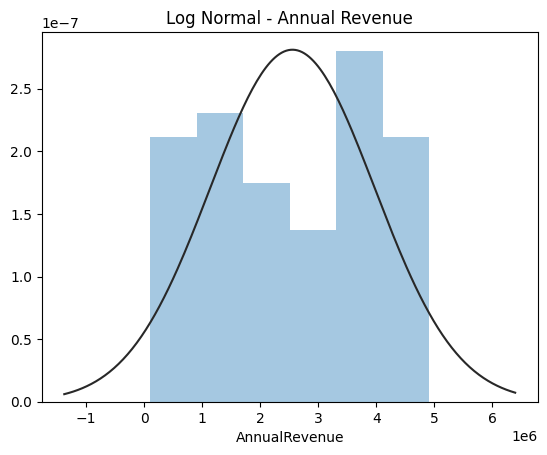

In [20]:
y = df['AnnualRevenue']
plt.figure(2); plt.title('Normal - Annual Revenue')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal - Annual Revenue')
sns.distplot(y, kde=False, fit=st.lognorm)

<Axes: title={'center': 'Log Normal - Credit Score'}, xlabel='CreditScore'>

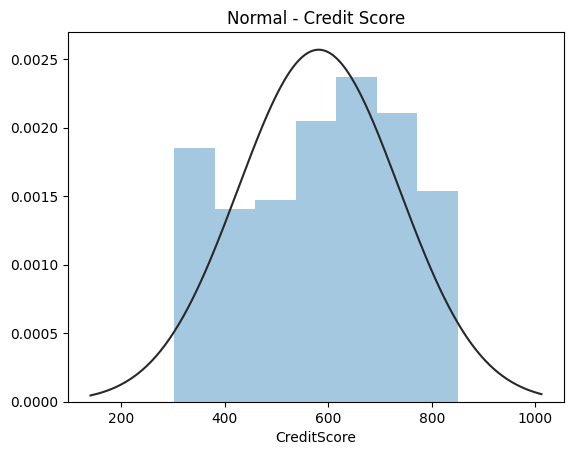

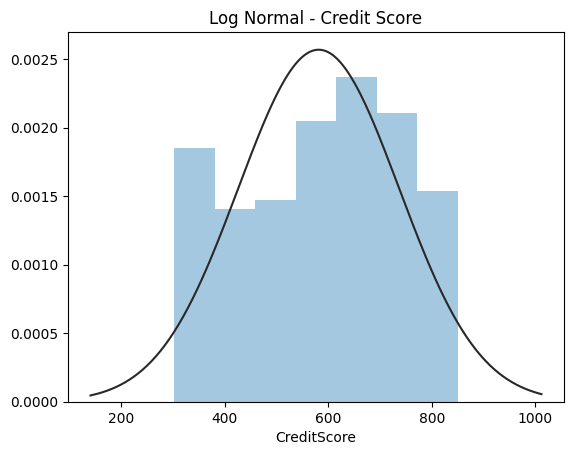

In [22]:
y = df['CreditScore']
plt.figure(2); plt.title('Normal - Credit Score')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal - Credit Score')
sns.distplot(y, kde=False, fit=st.lognorm)

<Axes: title={'center': 'Log Normal - Late Payments'}, xlabel='LatePayments'>

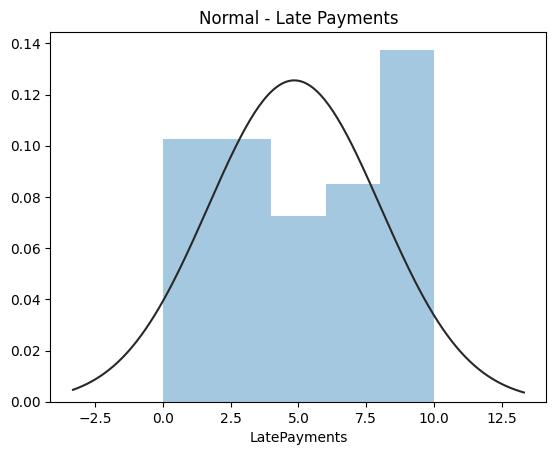

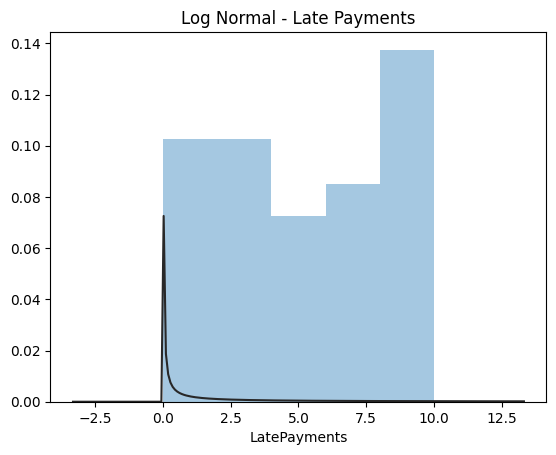

In [23]:
y = df['LatePayments']
plt.figure(2); plt.title('Normal - Late Payments')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal - Late Payments')
sns.distplot(y, kde=False, fit=st.lognorm)

In [25]:
df.columns

Index(['AnnualRevenue', 'CreditScore', 'LatePayments', 'Industry_Healthcare',
       'Industry_Retail', 'Industry_Technology', '6MonthsRevenue'],
      dtype='object')

In [26]:
X = df.drop('CreditScore', axis=1)
y = df['CreditScore']

In [27]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Initialize the individual models
lgbm = LGBMRegressor(boosting_type='dart', n_estimators=1000, learning_rate=0.1, random_state=42)
xgb = XGBRegressor()
catboost = CatBoostRegressor()
rf = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)

# Create the ensemble model
ensemble = VotingRegressor(
    estimators=[
        ('lgbm', lgbm),
        ('xgb', xgb),
        ('catboost', catboost),
    ]
)

In [85]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lgbm', lgbm)

])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 6
[LightGBM] [Info] Start training from score 583.818750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lgbm',
                 LGBMRegressor(boosting_type='dart', n_estimators=1000,
                               random_state=42))])

In [86]:
# Assess the accuracy of the model
y_pred = pipeline.predict(X_test)
y_pred

array([488.95050883, 607.03715722, 410.17607632, 601.11646627,
       588.52384479, 628.90457742, 619.80130931, 583.96844139,
       517.83175127, 714.85324815, 622.65292938, 551.5092032 ,
       646.80000424, 648.35507154, 376.80997784, 507.23328712,
       743.79003475, 447.60540435, 630.05090329, 480.2448032 ,
       675.49035708, 606.06488723, 515.67524407, 536.12972827,
       687.89692585, 488.87373393, 571.60949941, 599.47317274,
       699.39941762, 508.4979408 , 531.80337604, 603.74904511,
       559.16970418, 410.45112715, 704.01211019, 560.64735037,
       507.12885281, 577.31744725, 644.47780818, 475.56933987])

In [87]:
score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

Local RMSE: 157.87922298280213


In [88]:
# Save the ML Pipeline
import pickle

with open('credit_score_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [90]:
X_test

,AnnualRevenue,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology,6MonthsRevenue
95,691526.0,2.0,1.0,0.0,0.0,345763.0
15,3950636.0,5.0,1.0,0.0,0.0,1975318.0
30,884184.0,2.0,0.0,1.0,0.0,442092.0
158,302646.0,10.0,0.0,0.0,0.0,151323.0
128,3427152.0,8.0,1.0,0.0,0.0,1713576.0
115,4151395.0,9.0,0.0,0.0,0.0,2075697.5
69,1384439.0,9.0,0.0,1.0,0.0,692219.5
170,828997.0,7.0,1.0,0.0,0.0,414498.5
174,3366397.0,3.0,0.0,0.0,0.0,1683198.5
45,2908300.0,2.0,0.0,0.0,1.0,1454150.0


In [92]:
X_test.head(1)

,AnnualRevenue,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology,6MonthsRevenue
95,691526.0,2.0,1.0,0.0,0.0,345763.0


In [89]:
# Load the ML Pipeline
with open('credit_score_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

pipeline.predict(X_test)

array([488.95050883, 607.03715722, 410.17607632, 601.11646627,
       588.52384479, 628.90457742, 619.80130931, 583.96844139,
       517.83175127, 714.85324815, 622.65292938, 551.5092032 ,
       646.80000424, 648.35507154, 376.80997784, 507.23328712,
       743.79003475, 447.60540435, 630.05090329, 480.2448032 ,
       675.49035708, 606.06488723, 515.67524407, 536.12972827,
       687.89692585, 488.87373393, 571.60949941, 599.47317274,
       699.39941762, 508.4979408 , 531.80337604, 603.74904511,
       559.16970418, 410.45112715, 704.01211019, 560.64735037,
       507.12885281, 577.31744725, 644.47780818, 475.56933987])

In [94]:
pipeline.predict([[691526.0, 2.0, 1.0, 0.0, 0.0, 345763.0]])

array([488.95050883])